# Passive Aggressive Classifier

The passive-aggressive algorithms are a family of algorithms for large-scale learning. They are similar to the Perceptron in that they do not require a learning rate. However, contrary to the Perceptron, they include a regularization parameter C.

For **classification**, PassiveAggressiveClassifier can be used with loss='hinge' (PA-I) or loss='squared_hinge' (PA-II). 

For **regression**, PassiveAggressiveRegressor can be used with loss='epsilon_insensitive' (PA-I) or loss='squared_epsilon_insensitive' (PA-II).

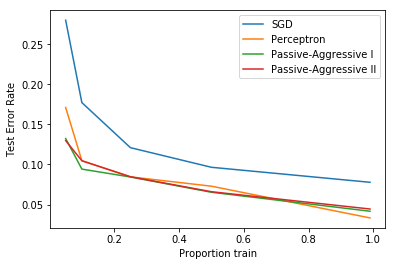

In [1]:
"""
==================================
Comparing various online solvers
==================================
  
An example showing how different online solvers perform
on the hand-written digits dataset.
  
"""
# Author: Rob Zinkov <rob at zinkov dot com>
# Updated by Mayank Johri [mayank at gmail dot  .com.]
# License: BSD 3 clause
  
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
  
heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
digits = datasets.load_digits()
  
classifiers = [
    ("SGD", SGDClassifier(max_iter=3)),
    ("Perceptron", Perceptron(max_iter=1000)),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge',
                                                         C=1.0, max_iter=1000 )),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0, max_iter=1000)),
]
  
xx = 1 - np.array(heldout)
for name, clf in classifiers:
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                                digits.target,
                                                                test_size=i)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    pl.plot(xx, yy, label=name)
  
pl.legend(loc="upper right")
pl.xlabel("Proportion train")
pl.ylabel("Test Error Rate")
pl.show()

## References:
    - Tutorials:
        - http://jmlr.csail.mit.edu/papers/volume7/crammer06a/crammer06a.pdf
        - ttic.uchicago.edu/~shai/ppt/PassiveAggressive.ppt
        - http://www.stokastik.in/building-an-incremental-named-entity-recognizer-system/